In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sns
from keras.models import load_model
from tensorflow.keras.preprocessing import image

In [2]:
model = load_model('Spine_Categorizer.h5')

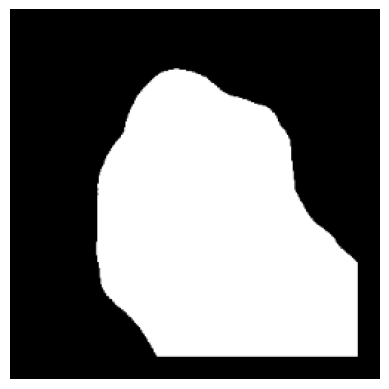

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
The uploaded image of spine belongs to the class FILOPODIA


In [5]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the original image
path = 's69.png'  # Change the path as per your actual image location
original_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Apply thresholding to get binary image
_, binary_img = cv2.threshold(original_img, 127, 255, cv2.THRESH_BINARY)

# Resize the binary image to target size
resized_binary_img = cv2.resize(binary_img, (250, 250))

# Expand dimensions to make it rank 3
resized_binary_img = np.expand_dims(resized_binary_img, axis=-1)

# Convert the binary image to PIL format
binary_pil_img = image.array_to_img(resized_binary_img)

# Display the binary image
plt.imshow(binary_pil_img, cmap='gray')
plt.axis('off')
plt.show()

# Convert the binary image to array and prepare for classification
x = image.img_to_array(binary_pil_img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# Load the classification model
model = tf.keras.models.load_model('Spine_Categorizer.h5')

# Perform classification
classes = model.predict(images, batch_size=16)
values = classes[0].tolist()
ind = values.index(max(values)) + 1

# Display the classification result
if ind == 1:
    print('The uploaded image of spine belongs to the class FILOPODIA')
elif ind == 2:
    print('The uploaded image of spine belongs to the class MUSHROOM')
elif ind == 3:
    print('The uploaded image of spine belongs to the class STUBBY')
elif ind == 4:
    print('The uploaded image of spine belongs to the class THIN')
